In [55]:
import os 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [48]:
DATA_DIR = "data"

In [49]:
def load_history(filename):
    path = os.path.join(DATA_DIR, filename)
    history = []
    first_line = True
    with open(path) as f:
        for line in f:
            if first_line:
                first_line = False
                shape = tuple(map(int, line.strip().split()))
                continue
            history.append(
                list(map(float, line.strip().split()))
            )
    
    history = np.array(history)
    assert shape == history.shape, f"{shape} != {history.shape}"
    return history

In [113]:
history = load_history("history.txt")

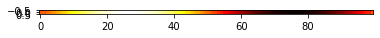

In [78]:
plt.imshow(history[5].reshape(1, -1), cmap='hot', interpolation='nearest')

/Users/mankuznetsov/miniconda3/envs/project/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.



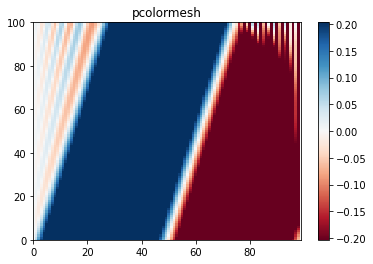

In [79]:
z = history
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

time = np.arange(z.shape[0])
x = np.arange(z.shape[1])

fig, ax = plt.subplots()

c = ax.pcolormesh(x, time, z, cmap='RdBu', vmin=z_min / 10, vmax=z_max / 10)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), time.min(), time.max()])
fig.colorbar(c, ax=ax)

plt.show()

## Animation

In [112]:
z.min()

-6168.58

Done!


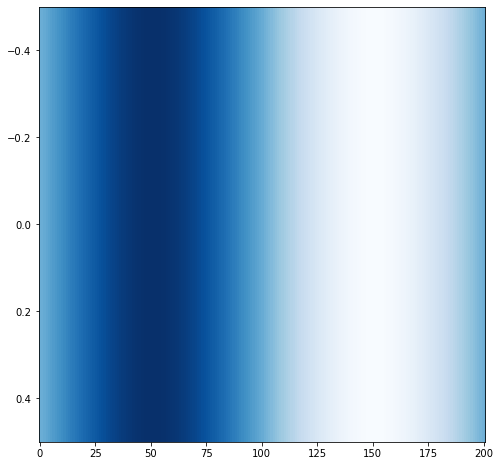

In [120]:
z = history
# z_min = history.min()
# z_max = history.max()
z_min = 0
z_max = 2

fps = 60

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

im = plt.imshow(z[0].reshape(1, -1), cmap='Blues', interpolation='none', aspect='auto', vmin=z_min, vmax=z_max)

def animate_func(i):
    im.set_array(z[i].reshape(1, -1))
    return [im]

anim = animation.FuncAnimation(
            fig, 
            animate_func, 
            frames = z.shape[0],
            interval = 1000 / fps, # in ms
)

# anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
print('Done!')

In [121]:
from IPython.display import HTML

HTML(anim.to_html5_video())